# K means clustering  for search  

load data and clean 

In [398]:
from os import listdir
from os.path import isfile, join

contents = []
PATH = "../data"
files = [f"{PATH}/{f}" for f in listdir(PATH) if isfile(join(PATH, f))]

for file_path in files: 
    with open(file_path, "r") as f:
        contents.append(f.read())

contents[0][:50]

'[![Cybernetically enhanced web apps: Svelte](https'

In [399]:
def load_stop_words(path:str="../stopwords.txt"):
   words = []
   with open(path, "r") as f: 
      words = f.read().split("\n")
   assert len(words) != 0, "no stop words were found"
   return words

In [400]:
import nltk
def clean(content:list):
    ascii_char = [chr(i) for i in range(0,255)]
    numbers = "0123456789"
    non_acc_char =  "\n,.()[]{}`/:-_*=\\<>|&%@?!\"\'#" + numbers
    non_acc_tokens = ["https","www", "com", "org", "license"]
    stop_words = load_stop_words()
    for i, _ in enumerate(content):
        for c in non_acc_char:
            content[i] = content[i].replace(c, " ")
        content[i] = content[i].split(" ")
        content[i] = list(filter(lambda c: c != "", content[i]))
        content[i] = [t for t in content[i] if not t in non_acc_tokens ] 
        content[i] = [s.lower() for s in content[i] if all(c in ascii_char for c in s)]
        content[i] = [t for t in content[i] if not t in stop_words] 
        ps = nltk.stem.PorterStemmer()
        content[i] = [ps.stem(t) for t in content[i]] 


    return [" ".join(con) for con in content]


contents = clean(contents)
contents

['cybernet enhanc app svelt sveltej github asset banner png svelt dev npm version img shield npm svelt svg npmj packag svelt img shield npm svelt svg licens chat img shield discord label chat logo discord svelt dev chat svelt svelt build applic compil take declar compon convert effici javascript surgic updat dom learn svelt svelt dev discord chatroom svelt dev chat support svelt svelt mit licens sourc project ongo develop fantast volunt support effort backer collect opencollect svelt fund donat collect compens expens svelt develop host cost suffici donat receiv fund support svelt develop roadmap view roadmap svelt dev roadmap develop pull request encourag pick issu github sveltej svelt issu aissue+i aopen+sort aupdat desc instal svelt local bash git clone github sveltej svelt git svelt npm instal yarn instal depend specif packag version packag lock json build svelt build compil modul includ packag bash npm build watch continu rebuild packag npm link doc npmj cli link project local bash

In [401]:

def words_to_vec(words:str, labels:dict={}):
    _words = words.split(" ")
    vec = []
    for word in _words:
        if word not in labels:
            labels[word]=len(labels)
        vec.append(labels[word])
    return vec, labels

### impl kmenas  

In [402]:
import numpy as np
import pandas as pd 
def transform_docs_to_mat(contents):
    labels={"NONE":0}
    seq = []

    for con in contents:
        _,labels = words_to_vec(con,labels=labels)
    max_len = len(labels)
    labels={"NONE":0}
    for con in contents:
        v,_ = words_to_vec(con,labels=labels)
        row = [0]*max_len
        for wt in v:
            row[wt] = 1
        seq.append(row)

    mat = np.array(seq)
    return mat, labels

In [403]:


file_idx = [i for i in range(len(files))]



In [404]:
for i, f in enumerate(files):
    print(i,f)


0 ../data/svelte_README.md
1 ../data/tensorflow_README.md
2 ../data/react_README.md
3 ../data/vuejs_README.md
4 ../data/gcc_README.txt
5 ../data/linux_README.txt
6 ../data/cpython_README.rst
7 ../data/pytorch_README.md
8 ../data/rust_README.md
9 ../data/cira_README.md


In [405]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd 
contents_mat, word_labels = transform_docs_to_mat(contents)
df = pd.DataFrame(contents_mat, files, columns=list(word_labels.keys()))
df.head()

,NONE,cybernet,enhanc,app,svelt,sveltej,github,asset,banner,png,...,alomst,realiz,req,venv,env,pytest,dir,mind,sold,acknowledg
../data/svelte_README.md,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
../data/tensorflow_README.md,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
../data/react_README.md,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/vuejs_README.md,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
../data/gcc_README.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


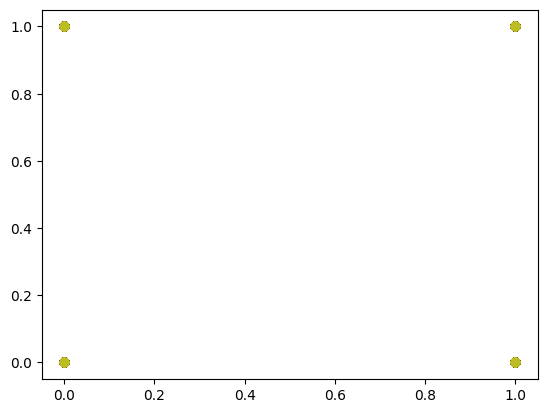

In [406]:

for i in range(len(files)-1):
    plt.scatter(df.iloc[i], df.iloc[i+1])

In [407]:

query = "I like cira bu rust is also good for javascript"
clean_q = clean([query])[0]
print(clean_q)
query_vec, _ = words_to_vec(clean_q, word_labels)
nq_vec = [0]*len(word_labels)
for w in query_vec:
    nq_vec[w] = 1
nq_vec = np.array(nq_vec[1:])
len(nq_vec)

cira bu rust javascript


1227

In [408]:
model = KMeans(n_clusters=len(files))
model_pred = model.fit(contents_mat)

/home/axel/Programs/repositories/uni/gitbay/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [409]:
q_pred = model.predict([nq_vec])[0]
files[q_pred]

'../data/cira_README.md'

In [410]:

#df.insert(loc=0, column="CLUSTER", value=model_pred)
df

,NONE,cybernet,enhanc,app,svelt,sveltej,github,asset,banner,png,...,alomst,realiz,req,venv,env,pytest,dir,mind,sold,acknowledg
../data/svelte_README.md,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
../data/tensorflow_README.md,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
../data/react_README.md,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/vuejs_README.md,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
../data/gcc_README.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/linux_README.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/cpython_README.rst,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/pytorch_README.md,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
../data/rust_README.md,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
../data/cira_README.md,0,0,0,1,0,0,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
